In [1]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import importlib
importlib.reload(thouless)
importlib.reload(hfun)
importlib.reload(cf)

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors
from scipy import linalg as la
from random import uniform as uni
from scipy.optimize import curve_fit as fit

print(cf.base_directory)

../results/disorder/PBC/


In [45]:

def load_loc(w = 0.2):
    name = "/Users/rafal.swietek/Projects/Transverse_Ising_ETH/IsignTransverse_ETH/results/HEISENBERG/disorder/PBC/LocLengthDist_%.2f.dat"%(w)
    loc_len = np.loadtxt(name, unpack=True)
    return np.array(loc_len)

def load_orbital(w = 0.2, n = 100):
    name = "/Users/rafal.swietek/Projects/Transverse_Ising_ETH/IsignTransverse_ETH/results/HEISENBERG/disorder/PBC/ObitalCorr_n=%d_w=%.2f.dat"%(n, w)
    orbital = np.loadtxt(name, unpack=True)
    return np.array(orbital)

L = 500
J = 1.0
dis = np.linspace(0.2, 0.8, 7)

def gaussian(x, mu, sigma, A):
    return A*np.exp(- (x-mu)**2 / (2*sigma**2))

(0.5, 500.0)

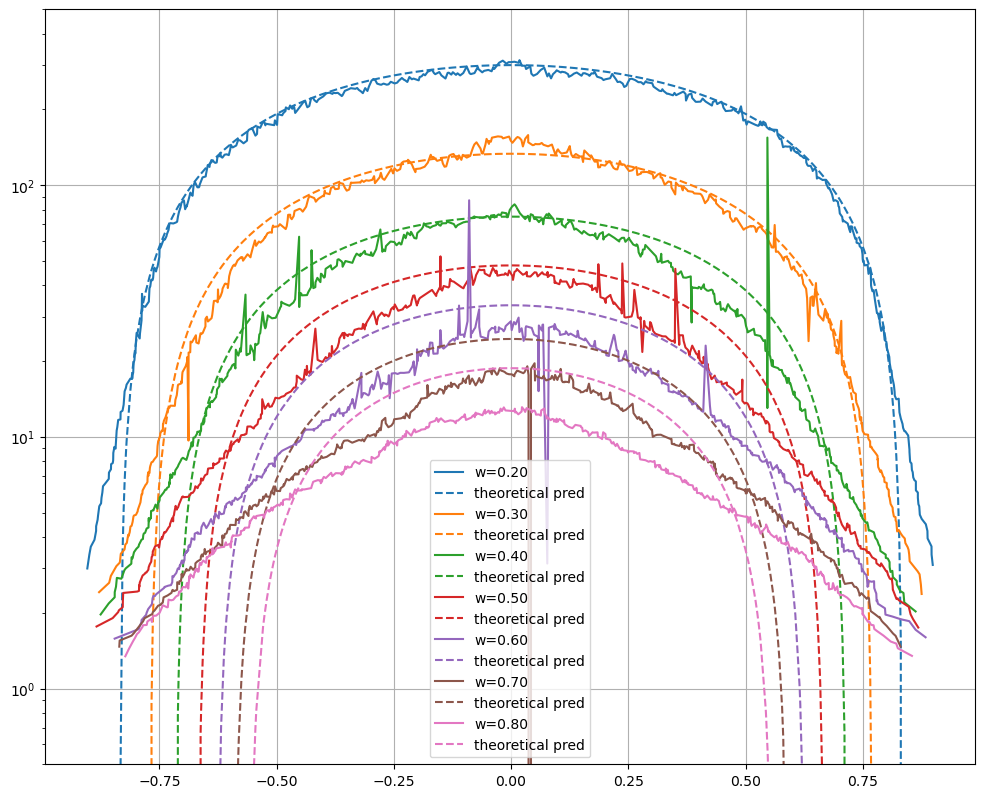

In [60]:

fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
for w in dis:
    loc_len = load_loc(w)
    if len(loc_len) > 0:
        p = ax.plot(loc_len[0], (loc_len[1]), label="w=%.2f"%(w))
        ax.plot(loc_len[0], 12.0 / (w**2) * ( 1 - ( (1+w)*loc_len[0] )**2), color=p[0].get_color(), linestyle ='--', label="theoretical pred")
        #pars, sth = fit(gaussian, loc_len[0], loc_len[1])
        #ax.plot(loc_len[0], gaussian(loc_len[0], *pars), color=p[0].get_color(), linestyle =':', label="gauss fit")
ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set_ylim(5e-1,5e2)


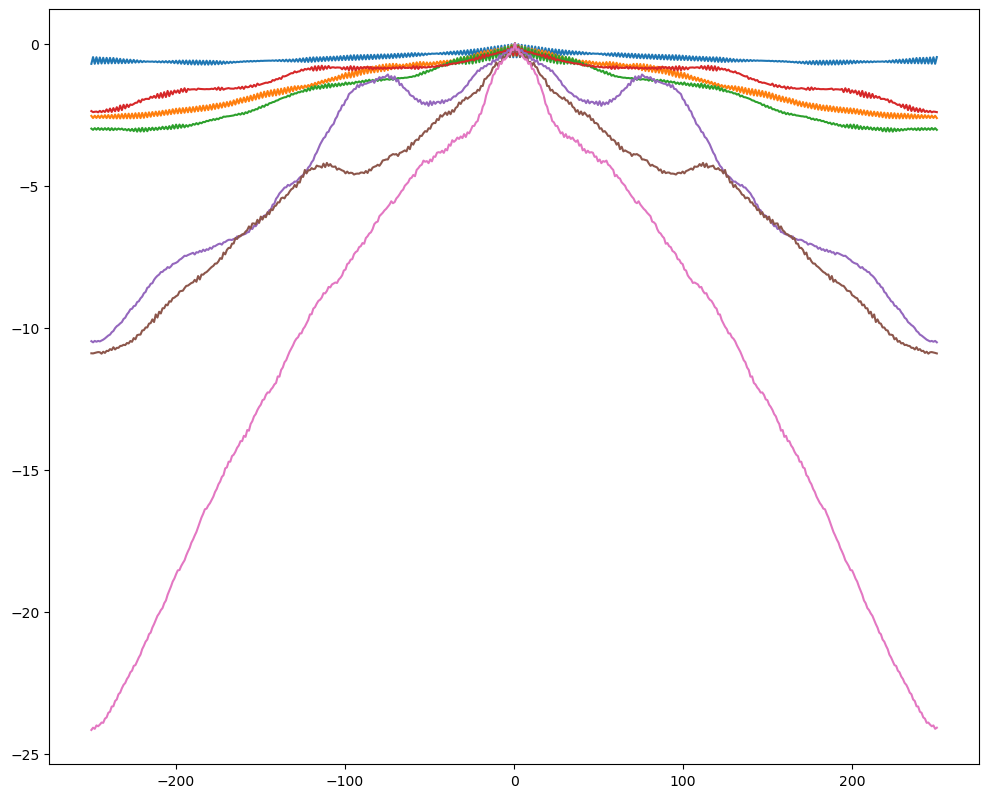

In [61]:
fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
for w in dis:
    loc_len = load_orbital(w, L/2)
    if len(loc_len) > 0:
        p = ax.plot(loc_len[0], (loc_len[1]), label="w=%.2f"%(w))
        #ax.plot(loc_len[0], 96.0 / (w**2) * (1-loc_len[0]**2), color=p[0].get_color(), linestyle ='--', label="theoretical pred")

#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(1e-1,3e1)

In [33]:
#--- GENERATE DISORDER
def generate_disorder(size, h):
    disorder = [0 for _ in range(size)]
    for i in range(size):
        disorder[i] = uni(-h, h)
    return disorder

#--- GENERATE ORBITALS
def orbtials(system_size, J, h):
    disorder = generate_disorder(system_size, h)
    H = [[0 for _ in range(system_size)] for _ in range(system_size)] # initialize matrix of given size
    
    for i in range(0, system_size):
        H[i][ (i + 1) % system_size] = J / 2.
        H[ (i + 1) % system_size][i] = J / 2.
        H[i][i] = disorder[i]
    H = np.array(H)
    
    eigvals, eigvecs = la.eig(H)
    return eigvals, eigvecs    


#--- FIT FUNCTION
def fit_func(x, ksi, A):
    return -np.abs(x) / ksi + A;

0.4 0
0.4 1
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.4 20
0.4 21
0.4 22
0.4 23
0.4 24
0.4 25
0.4 26
0.4 27
0.4 28
0.4 29
0.4 30
0.4 31
0.4 32
0.4 33
0.4 34
0.4 35
0.4 36
0.4 37
0.4 38
0.4 39
0.4 40
0.4 41
0.4 42
0.4 43
0.4 44
0.4 45
0.4 46
0.4 47
0.4 48
0.4 49
0.4 50
0.4 51
0.4 52
0.4 53
0.4 54
0.4 55
0.4 56
0.4 57
0.4 58
0.4 59
0.4 60
0.4 61
0.4 62
0.4 63
0.4 64
0.4 65
0.4 66
0.4 67
0.4 68
0.4 69
0.4 70
0.4 71
0.4 72
0.4 73
0.4 74
0.4 75
0.4 76
0.4 77
0.4 78
0.4 79


KeyboardInterrupt: 

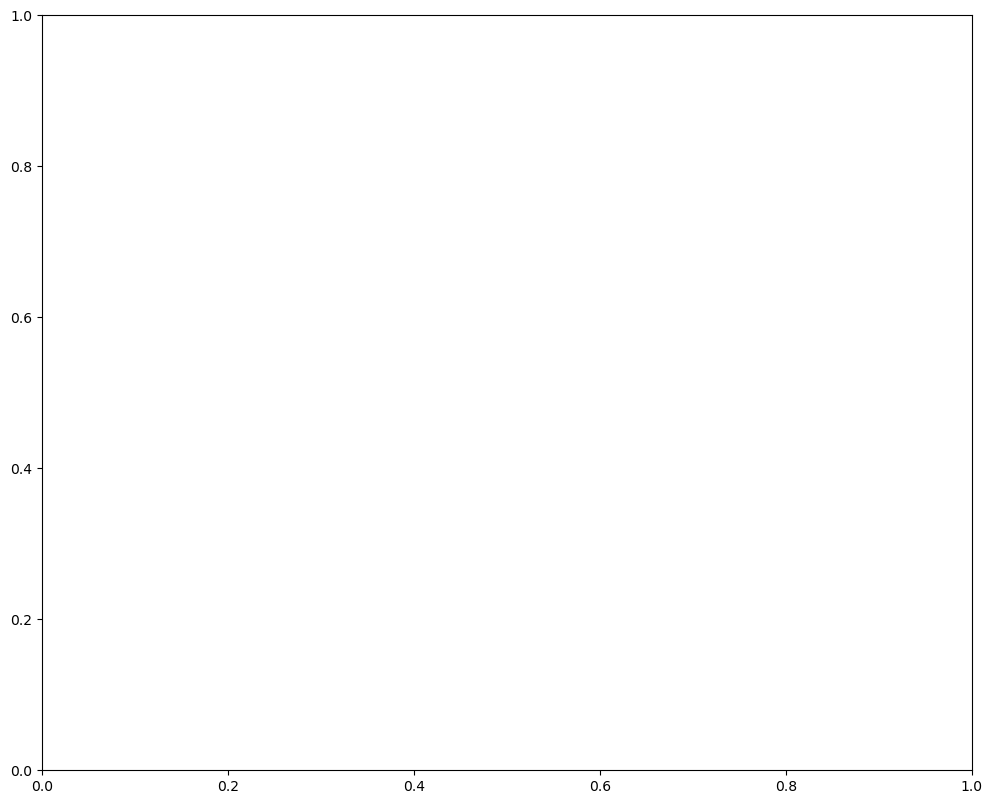

In [34]:
L = 10
realisations = 101
J = 1.0
dis = []
for i in range(0, 14) :
    dis.append(0.4 + i * 0.2)

r_vals = range(-int(L / 2), int(L / 2), 1)

fig, ax = plt.subplots(figsize=(12,10), dpi = 100)
for w in dis:
    loc_len = [0 for _ in range(L)]
    E = []
    for realis in range(0, realisations):
        eigvals, eigvecs = orbtials(system_size=L, J = J, h = w)
        E = eigvals
        f = 0
        for state in eigvecs:
            fit_data = []
            for k in range(0, len(r_vals)):
                val = 0
                r = r_vals[k]
                for n in range(0, L):
                    idx = (n + r) % L
                    val += np.abs(state[n] * state[idx])
                fit_data.append(np.log(val))

            pars, sth = fit(fit_func, r_vals, fit_data)
            loc_len[f] += pars[0] / float(realisations)
            f = f+1
        print(w, realis)
    ax.plot(E, loc_len)
ax.set_yscale('log')
plt.show()
